# 聚类实践

In [17]:
import sklearn.datasets as ds
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


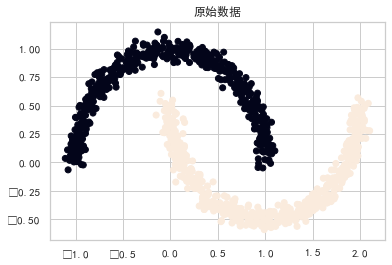

In [18]:
# 拟合月牙形数据
N=1000
data1, y1 = ds.make_moons(n_samples=N, noise=.05)
plt.title("原始数据")
plt.scatter(data1[:,0],data1[:,1],marker="o",c=y1)
plt.show() 

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


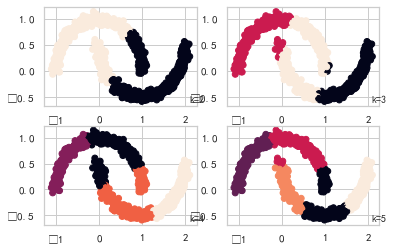

In [24]:
for index,k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred=KMeans(n_clusters=k,random_state=6).fit_predict(data1)
    plt.scatter(data1[:,0],data1[:,1],c=y_pred)
    plt.text(0.95,0.03,"k=%d" %k,transform=plt.gca().transAxes,horizontalalignment="left")
plt.show()

In [21]:
minmax_scaler = MinMaxScaler()
data1_scaler = minmax_scaler.fit_transform(data1)

In [22]:
minmax_scaler = MinMaxScaler()
data1_scaler = minmax_scaler.fit_transform(data1)

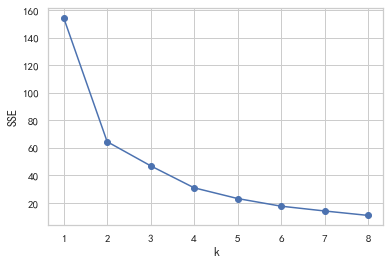

In [25]:
SSE = [] # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k) # 构造聚类器
    estimator.fit(data1_scaler)
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
    X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [27]:
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

In [28]:
agg =AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
agg =agg.fit(data1) 

In [29]:
import scipy.cluster.hierarchy as sch
a= sch.distance.pdist(data1,'euclidean')
a 

array([0.79984146, 0.99740936, 1.12171353, ..., 0.67850674, 0.37365211,
       0.30487778])

In [33]:
z=sch.linkage(a,method='ward')
z 

array([[3.03000000e+02, 6.61000000e+02, 4.77028496e-04, 2.00000000e+00],
       [5.23000000e+02, 8.94000000e+02, 1.15123028e-03, 2.00000000e+00],
       [5.05000000e+02, 8.71000000e+02, 1.20322719e-03, 2.00000000e+00],
       ...,
       [1.99100000e+03, 1.99400000e+03, 1.15430319e+01, 4.46000000e+02],
       [1.99300000e+03, 1.99600000e+03, 2.00046091e+01, 6.85000000e+02],
       [1.99500000e+03, 1.99700000e+03, 3.23056471e+01, 1.00000000e+03]])

In [32]:
from sklearn.cluster import DBSCAN
eps_list=[0.5,0.2,0.08,0.05]
for eps in eps_list:
    y_pred=DBSCAN(eps=eps).fit_predict(data1)
y_pred 

array([ 0,  1,  1,  5,  0,  3,  1,  2,  2,  3,  4,  5,  3,  5, -1, -1,  0,
        3,  5,  2,  3,  0,  2,  4,  6,  0,  0,  0, -1, -1,  3,  0, -1,  0,
        0,  0,  1,  3,  7,  0,  1,  0,  1, -1,  3,  1,  3,  3, -1,  4,  0,
        3,  0,  4,  7,  3,  2,  5,  4,  2,  7,  0,  8,  0,  3, -1, -1, -1,
       -1, -1,  5,  1,  2,  1,  5,  9,  3,  5,  5,  3,  0,  8,  2,  5,  2,
        0,  3,  4,  5, 10,  5,  2,  7,  2,  1,  0,  5,  0,  1,  1,  4,  3,
        3,  5,  5,  3,  1,  2,  3,  0,  3,  3,  4,  5,  0,  5,  5,  3,  1,
       -1,  0,  5,  0,  2, -1,  5,  0,  3,  0,  1,  9,  0,  5,  0,  1,  1,
       -1,  9,  5,  0, -1,  2,  2,  5,  3,  0,  3, -1,  0,  0,  0,  9,  7,
        0,  0,  3,  5,  2,  0,  4,  5,  2,  4,  4,  1,  4,  5,  1,  0,  9,
        0,  5, -1,  9,  0,  4,  0,  1,  1,  9,  3, -1,  3, -1,  7,  5,  2,
        0,  1,  7,  5, -1,  5,  4, -1,  2,  2,  0,  3,  4,  2,  0,  0,  4,
        1,  2,  5,  5,  0,  9,  5,  2,  1,  0,  4,  3,  0,  3,  5,  4,  0,
        1,  2,  1,  0,  2

K-Means聚类优点：1、算法收敛速度很快，仅需20次以内的迭代就能得出最终聚类结果。2、理论清晰，算法简单，很有实用价值的示例学习算法；

K-Means聚类缺点：1、需要对均值给出定义, 2、需要指定要聚类的数目；
3、一些过大的异常值会带来很大影响； 4、算法对初始选值敏感； 5、适合球形聚类。

层次聚类优点：1、对样本的输入顺序是不敏感 2、层次聚类是可以通过设置不同的相关参数值，可以得到不同粒度上的多层次聚类结构；3、在聚类形状方面，层次聚类适用于任意形状的聚类；。 

层次聚类缺点：1、层次聚类
算法的时间复杂度大；2、聚类过程具有不可逆性；3、层次聚类终止条件不精确；

层次聚类优点：1、对样本的输入顺序是不敏感 2、层次聚类是可以通过设置不同的相关参数值，可以得到不同粒度上的多层次聚类结构；3、在聚类形状方面，层次聚类适用于任意形状的聚类；。 

层次聚类缺点：1、层次聚类
算法的时间复杂度大；2、聚类过程具有不可逆性；3、层次聚类终止条件不精确；

## 利用广告数据练习实现层次聚类和密度聚类(DBSCAN)，并与K-Means聚类比较，说明不同聚类方法的优缺点

#### 注1：实现层次聚类和密度聚类时可选取一小部分数据实现
#### 注2：需要有代码，用文字说明不同聚类方法的优缺点

In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer  # 字符串分类转整数分类库
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler库
from sklearn.cluster import KMeans   # KMeans 模块
from sklearn import metrics   # 效果评估模块
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook',font='simhei',style='whitegrid') 
%matplotlib inline

In [2]:
data = pd.read_csv('F:/大三（上）/机器学习/聚类实践作业/ad_performance.txt',delimiter='\t')
data.head(3)

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20.0,jpg,banner,roi,140*40,打折
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19.0,jpg,banner,cpc,140*40,满减
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4.0,jpg,banner,cpc,140*40,满减


渠道代号：业务方统一命名规划的唯一渠道标志

日均uv：每天的平均独立访客，从一个渠道中带来的一个访客，即使一天中到达多次都统计为1次。

平均注册率：日均注册的用户数/平均每天的访问量

平均搜索量：平均每个访问的搜索次数

访问深度：总页面浏览量/平均每天的访问量

平均停留时间：总停留时间/平均每天的访问量

订单转化率：总订单数量/平均每天的访问量

投放总时间：每个广告媒介在站外投放的天数

素材类型：广告素材包括jpg,gif,swf,sp

广告类型：广告投放类型，包括banner, tips、横幅、通栏、暂停以及不确定（不知道是何种形式）

合作方式：包括roi, cpc, cpm和cpd

广告尺寸：每个广告投放的尺寸大小，包括140x40、308x388、450x300、600x90、480x360、960x126、900x120、390x270

广告卖点：广告素材主要的卖点诉求信息，包括打折、满减、满赠、秒杀、直降、满返

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   渠道代号    889 non-null    object 
 1   日均UV    889 non-null    float64
 2   平均注册率   889 non-null    float64
 3   平均搜索量   889 non-null    float64
 4   访问深度    889 non-null    float64
 5   平均停留时间  887 non-null    float64
 6   订单转化率   889 non-null    float64
 7   投放总时间   889 non-null    float64
 8   素材类型    889 non-null    object 
 9   广告类型    889 non-null    object 
 10  合作方式    889 non-null    object 
 11  广告尺寸    889 non-null    object 
 12  广告卖点    889 non-null    object 
dtypes: float64(7), object(6)
memory usage: 90.4+ KB


In [4]:
# 这样用表格形式展示每个字段有多少缺失值
pd.DataFrame(data.isnull().sum(),columns=["num"]).T

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
num,0,0,0,0,0,2,0,0,0,0,0,0,0


In [5]:
# 缺失值用字段均值代替
data_2  = data.fillna(data["平均停留时间"].mean())

# 描述性统计
data_2.describe().round(3)

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
count,889.000,889.000,889.000,889.000,889.000,889.000,889.000
mean,540.847,0.001,0.030,2.167,262.669,0.003,16.053
std,1634.410,0.003,0.106,3.801,224.112,0.012,8.509
min,0.060,0.000,0.000,1.000,1.640,0.000,1.000
25%,6.180,0.000,0.001,1.392,126.200,0.000,9.000
50%,114.180,0.000,0.003,1.793,236.660,0.000,16.000
75%,466.870,0.001,0.012,2.216,357.930,0.002,24.000
max,25294.770,0.039,1.037,98.980,4450.830,0.216,30.000


从描述性统计我们可以看到

1.UV的数据波动很大，说明不同渠道差异是很明显的。但是差异并不一定是异常值，广告流量的特征是有爆发性的，所以一般不作为异常值处理。

2.可以看到平均注册率，平均搜索量，订单转化率多个统计量为0，但是考虑到极大值本身就很小，说明数据本身就很小，符合实际情况，所以是正常的。

In [6]:
data_2.corr().round(2)

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
日均UV,1.00,-0.05,-0.07,-0.02,0.04,-0.05,-0.04
平均注册率,-0.05,1.00,0.24,0.11,0.22,0.32,-0.01
平均搜索量,-0.07,0.24,1.00,0.06,0.17,0.13,-0.03
访问深度,-0.02,0.11,0.06,1.00,0.72,0.16,0.06
平均停留时间,0.04,0.22,0.17,0.72,1.00,0.25,0.05
订单转化率,-0.05,0.32,0.13,0.16,0.25,1.00,-0.00
投放总时间,-0.04,-0.01,-0.03,0.06,0.05,-0.00,1.00


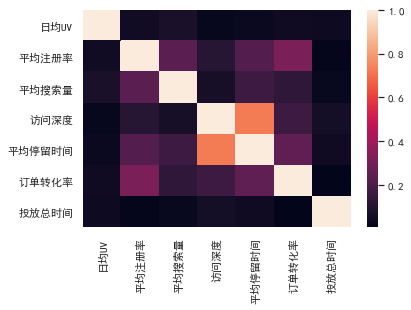

In [33]:
import seaborn as sns
corrmat=data_2.corr().abs()
sns.heatmap(corrmat)
plt.show()

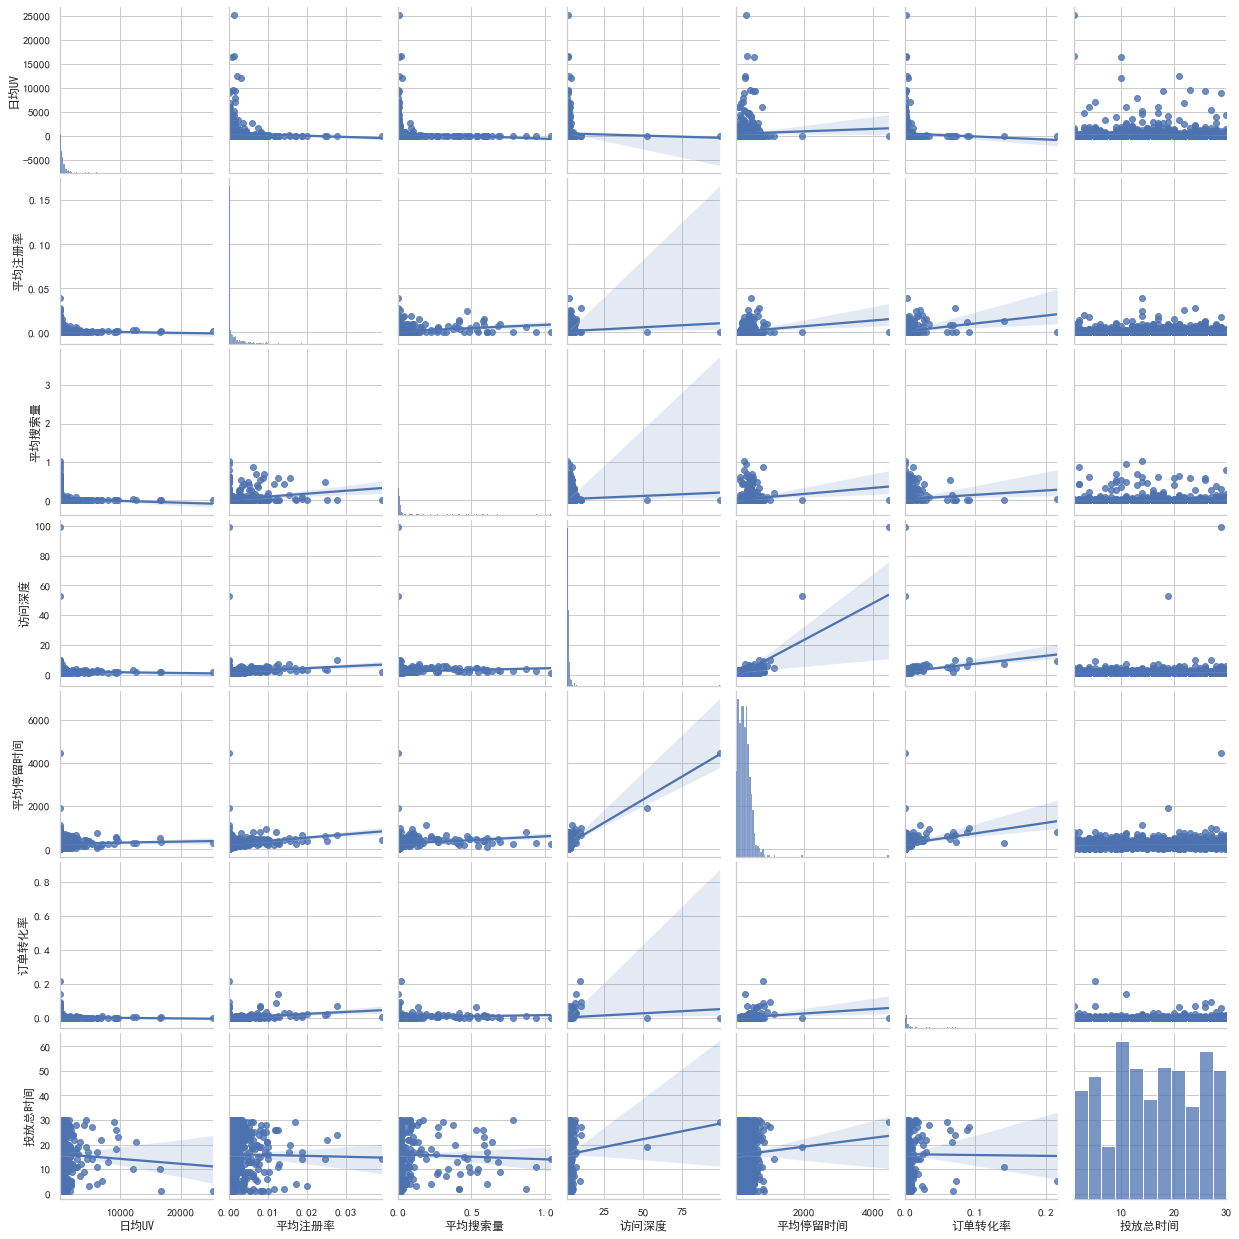

In [32]:
# 绘制分布图
sns.pairplot(data_2,kind='reg') 

In [7]:
# 将字符串转换成整数，离散化
cols = ["素材类型", "广告类型", "合作方式", "广告尺寸", "广告卖点"]

convert_matrix = data_2[cols]
lines = convert_matrix.shape[0]
dict_list = []  # 存放字符串与对应索引组成的字典
unique_list = []  # 总唯一值列表，用于存放每个列的唯一值列表

for col_name in cols:
    col_unique_vlaue = data_2[col_name].unique().tolist()  # 每列唯一值列表
    unique_list.append(col_unique_vlaue)  # 将列表存入总表
    
for line_index in range(lines):
    each_record = convert_matrix.iloc[line_index]   # 读取每行数据,结果是series
    for each_index,each_data in enumerate(each_record):
        # 读取series中每行的值及其对应的index（原列名）的数字索引值。
        list_value = unique_list[each_index]
        # 读取行索引对应的列唯一值
        each_record[each_index] = list_value.index(each_data)
        # 将每一个值对应到唯一值列表中的索引
    each_dict = dict(zip(cols,each_record))
    dict_list.append(each_dict)
    
model_transform = DictVectorizer(separator=False,dtype=np.int64)
data_dicvec = model_transform.fit_transform(dict_list).toarray()
data_dicvec

array([[0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       ...,
       [1, 0, 6, 4, 1],
       [3, 0, 6, 4, 1],
       [1, 4, 7, 5, 2]], dtype=int64)

从数据可以看到，UV和转化率这些字段的数据处在不同的量级，UV有上万，而转化率却小于1，因此需要做数据标准化，这里采用MINMAX标准化

In [8]:
# 数据标准化
scaler_matrix = data_2.iloc[:,1:8]
minmax_scaler = MinMaxScaler()
data_scaler = minmax_scaler.fit_transform(scaler_matrix)

# 合并数据
data3 = np.hstack((data_scaler,data_dicvec))  # 横向合并
data3

array([[1.43508267e-04, 1.81585678e-01, 2.06364513e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06234624e-03, 1.02301790e-01, 3.12439730e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.62565928e-03, 5.62659847e-02, 5.11089682e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22741079e-02, 5.11508951e-03, 2.70009643e-03, ...,
        6.00000000e+00, 4.00000000e+00, 1.00000000e+00],
       [5.41741732e-02, 2.55754476e-03, 1.54291225e-03, ...,
        6.00000000e+00, 4.00000000e+00, 1.00000000e+00],
       [3.16271663e-05, 0.00000000e+00, 0.00000000e+00, ...,
        7.00000000e+00, 5.00000000e+00, 2.00000000e+00]])

### 层次聚类

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

In [10]:
# 训练
cmodel = AgglomerativeClustering(n_clusters = 6, linkage='ward').fit(data3)
label = cmodel.labels_
print("Number of points: %i" % label.size)

Number of points: 889


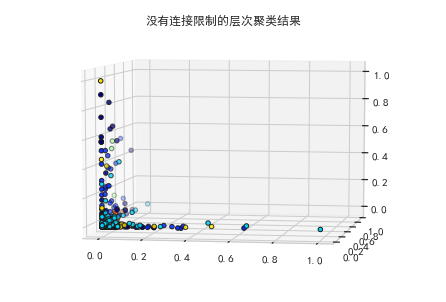

In [34]:
plt.rcParams['font.sans-serif']=['SimHei']

# 可视化
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(data3[label == l, 0], data3[label == l, 1], data3[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title("没有连接限制的层次聚类结果")
plt.show()

In [12]:
# 定义一个数据结构A，这里有10个最近的邻居
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data3, n_neighbors=10, include_self=False)

In [13]:
# 训练
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(data3)
label = ward.labels_
print("Number of points: %i" % label.size)

Number of points: 889


E:\Anaconda3\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:247: UserWarning: the number of connected components of the connectivity matrix is 12 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


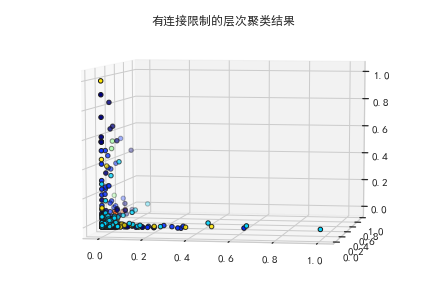

In [35]:
# 可视化
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(data3[label == l, 0], data3[label == l, 1], data3[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('有连接限制的层次聚类结果')
plt.show()

### 密度聚类(DBSCAN)

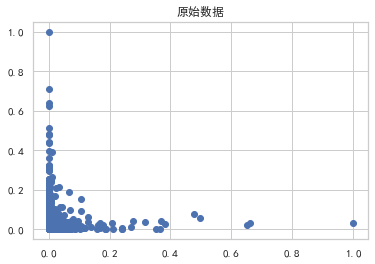

In [18]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.title("原始数据")
plt.scatter(data3[:,0],data3[:,1],marker="o")
plt.show()

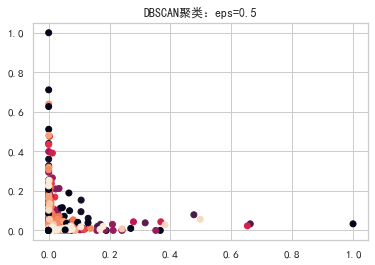

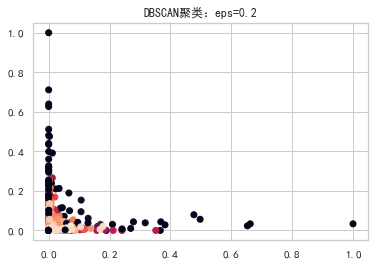

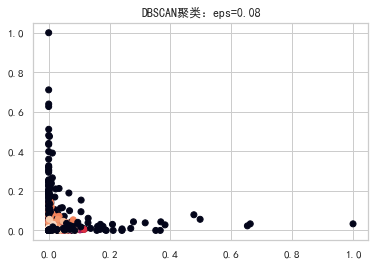

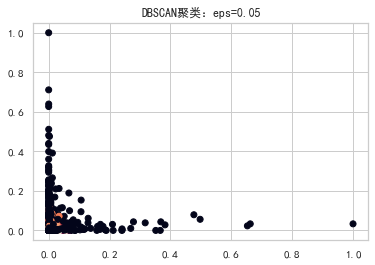

In [20]:
#应用密度聚类
from sklearn.cluster import DBSCAN
eps_list=[0.5,0.2,0.08,0.05]  #eps分别取不同的值，其他参数值一样
for eps in eps_list:
    y_pred=DBSCAN(eps=eps).fit_predict(data3)
    plt.title("DBSCAN聚类：eps=%s" %eps)
    plt.scatter(data3[:,0],data3[:,1],c=y_pred)
    plt.show()

### K-Means聚类

In [21]:
k =3
kmodel = KMeans(n_clusters = k,random_state=0) 
kmodel.fit(data3) #训练模型

KMeans(n_clusters=3, random_state=0)

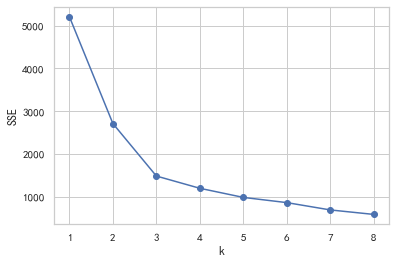

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

'利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data3)
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [23]:
score_list = []   # 储存系数的列表
score_init = -1   # 初始轮廓系数
for n_k in range(2,11):
    model_kmeans = KMeans(n_clusters=n_k,random_state=0)  # 建立模型
    cluster_tmp = model_kmeans.fit_predict(data3) # 训练模型
    score_tmp = metrics.silhouette_score(data3,cluster_tmp)  # 得到K值的轮廓系数
    if score_tmp > score_init:  # 如果这个系数更高
        good_k = n_k  #储存K值
        score_init = score_tmp  #储存轮廓系数，做下次比较
        good_model = model_kmeans  # 储存模型
        good_cluster = cluster_tmp  # 储存聚类标签
    score_list.append([n_k,score_tmp])


print('{:-^60}'.format('K value and silhouette summary:'))
print(np.array(score_list)) #打印输出k下的详细得分
print ('Best K is:{0} with average silhouette of {1}'.format(good_k, score_init.round(4)))

--------------K value and silhouette summary:---------------
[[ 2.          0.46692821]
 [ 3.          0.54904646]
 [ 4.          0.56968547]
 [ 5.          0.49697432]
 [ 6.          0.4390303 ]
 [ 7.          0.48204261]
 [ 8.          0.50913308]
 [ 9.          0.52697493]
 [10.          0.54338762]]
Best K is:4 with average silhouette of 0.5697


结果显示了不同k下的平均轮廓得分。

就经验看，如果平均轮廓得分值小于0，意味着聚类效果不佳；

如果值大于0且小于0.5，说明聚类效果一般；如果值大于0.5，则说明聚类效果比较好。

本案例中，k=4时，得分0.5697，说明效果较好。

In [25]:
good_k =4
kmodel = KMeans(n_clusters =good_k,random_state=0) 
kmodel.fit(data3) #训练模型

KMeans(n_clusters=4, random_state=0)

In [26]:
pd.Series(kmodel.labels_).value_counts()  #统计各个类别的数目

1    411
0    297
2    154
3     27
dtype: int64

In [27]:
kmodel.cluster_centers_  #各个类别的中心

array([[0.01823786, 0.03584007, 0.04265509, 0.01453513, 0.07498273,
        0.01661262, 0.54754441, 0.62962963, 4.03703704, 2.97643098,
        1.94276094, 0.38720539],
       [0.02131106, 0.02454247, 0.02230043, 0.0088128 , 0.0453313 ,
        0.00893557, 0.50348184, 0.88321168, 0.35036496, 2.91484185,
        1.91484185, 0.54014599],
       [0.02462089, 0.06782476, 0.01937094, 0.01207341, 0.05573705,
        0.01528448, 0.50985222, 0.97402597, 1.32467532, 0.68831169,
        0.00649351, 0.00649351],
       [0.03848938, 0.03078526, 0.04902675, 0.02932336, 0.09896783,
        0.02774784, 0.49553001, 1.03703704, 0.2962963 , 5.77777778,
        3.77777778, 0.77777778]])

In [28]:
cluster=pd.DataFrame(kmodel.labels_,columns=['cluster'])
merge_data = pd.concat((data_2,cluster),axis=1)
merge_data.head()

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点,cluster
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20.0,jpg,banner,roi,140*40,打折,2
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19.0,jpg,banner,cpc,140*40,满减,2
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4.0,jpg,banner,cpc,140*40,满减,2
3,A389,1.09,0.0074,0.3382,4.2426,364.07,0.0153,10.0,jpg,banner,cpc,140*40,满减,2
4,A390,3.37,0.0028,0.1740,2.1934,313.34,0.0007,30.0,jpg,banner,cpc,140*40,满减,2


In [29]:
# 计算每个类别的计数
cluster_count = pd.DataFrame(merge_data["渠道代号"].groupby(
                merge_data['cluster']).count()).T.rename({"渠道代号":"count"})

# 计算每个类别的占比
cluster_ratio = (cluster_count / len(merge_data)).round(4).rename(
                {"count":"per"})

cluster_features = []  # 空列表，储存特征信息
for line in range(good_k):
    label_data = merge_data[merge_data["cluster"] == line]  # 获得特定类别数据
    part1_data = label_data.iloc[:,1:8] # 获得数值型数据
    part1_desc = part1_data.describe().round(3)
    merge_data_mean = part1_desc.iloc[2,:]   # 均值特征
    
    part2_data = label_data.iloc[:,8:-1]   # 获得字符串数据特征
    part2_desc = part2_data.describe(include="all")
    merge_data2_mean = part2_desc.iloc[2,:]   # 均值特征
    merge_line = pd.concat((merge_data_mean,merge_data2_mean),axis=0)  # 合并
    cluster_features.append(merge_line)  # 添加到列表中
    
cluster_df = pd.DataFrame(cluster_features).T
cluster_all = pd.concat((cluster_count,cluster_ratio,cluster_df),axis=0)
cluster_all

,0,1,2,3
count,297,411,154,27
per,0.3341,0.4623,0.1732,0.0304
日均UV,1194.69,1369.81,2718.7,1263.03
平均注册率,0.003,0.003,0.005,0.003
平均搜索量,0.144,0.082,0.051,0.151
访问深度,5.728,0.918,0.948,9.8
平均停留时间,285.992,165.094,104.14,374.689
订单转化率,0.016,0.009,0.007,0.017
投放总时间,8.57,8.462,8.569,7.996
素材类型,jpg,swf,jpg,swf


In [30]:
# 绘制极坐标图来可视化数据特征
num_sets = cluster_df.iloc[:7,:].T.astype(np.float64)   # 提取展示的数据
print(num_sets)
num_sets_minmax = minmax_scaler.fit_transform(num_sets)  # 标准化
print('-'*20,'num_sets_minmax','-'*20)
print(num_sets_minmax)

       日均UV  平均注册率  平均搜索量   访问深度   平均停留时间  订单转化率  投放总时间
0  1194.692  0.003  0.144  5.728  285.992  0.016  8.570
1  1369.808  0.003  0.082  0.918  165.094  0.009  8.462
2  2718.703  0.005  0.051  0.948  104.140  0.007  8.569
3  1263.027  0.003  0.151  9.800  374.689  0.017  7.996
-------------------- num_sets_minmax --------------------
[[0.         0.         0.93       0.5415447  0.6721592  0.9
  1.        ]
 [0.11490468 0.         0.31       0.         0.22529745 0.2
  0.81184669]
 [1.         1.         0.         0.00337762 0.         0.
  0.99825784]
 [0.04483892 0.         1.         1.         1.         1.
  0.        ]]


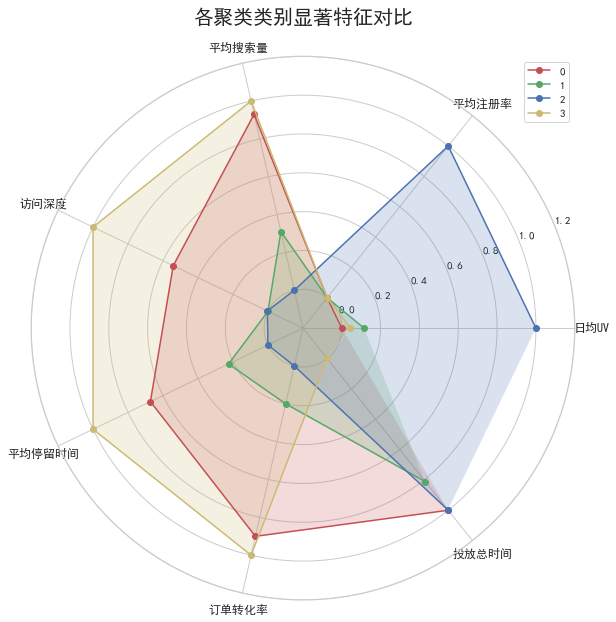

In [31]:
# 绘图

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,polar=True)
labels = np.array(merge_data_mean.index)   # 数据标签
colors = ['r','g','b','y']
angles = np.linspace(0,2*np.pi,len(labels),endpoint=False)   # 计算各区间角度


for i in range(len(num_sets)):
    df=  num_sets_minmax[i,:]
    ax.plot(angles,df,'o-',c=colors[i],label=i) 
    ax.fill(angles,df, facecolor=colors[i], alpha=0.2)# 填充颜色和透明度
    
ax.set_thetagrids(angles*180/np.pi,labels,fontproperties='SimHei',fontsize=12)
ax.set_title("各聚类类别显著特征对比",fontsize=20)  # 设置标题放置
ax.set_rlim(-0.2, 1.2)  # 设置坐标轴尺度范围
plt.legend(loc=0)  # 设置图例位置
plt.show()  # 展示图像

简要分析

从数据上初步分析：

0号类别占比最大，但是在数据特征上没有突出的亮点，各方面都很平庸。

1号类别有着33%的占比，同时在平均搜索量，停留时间，访问深度及订单转化率方面表现突出

2号类别与1号相似度很高，并且在1号的典型特征上表现更好，但是占比过低，只有3%

3号类别与其他类别区别明显，体现出流量大的特征。但是流量质量较差。
针对业务如何选择不同类别的广告渠道。

0号广告渠道各方面表现一般，需要重新考虑投放价值，在资金紧张时可以考虑取舍。

1号和2号广告渠道是流量质量较高的渠道，尤其是渠道2.所以运营策略里，应该加强对注册引导，注册激励方面的引导。重点宣传打折，直降等重点，广告尺寸适宜900*120尺寸。此类广告渠道应作为流量质量支撑的角色，在投放组合中重点考虑。

3号渠道是典型的流量型渠道，以作为营销活动中的流量骨干，引流效果明显。投放宜以满减为促销点，广告尺寸适宜308*388.

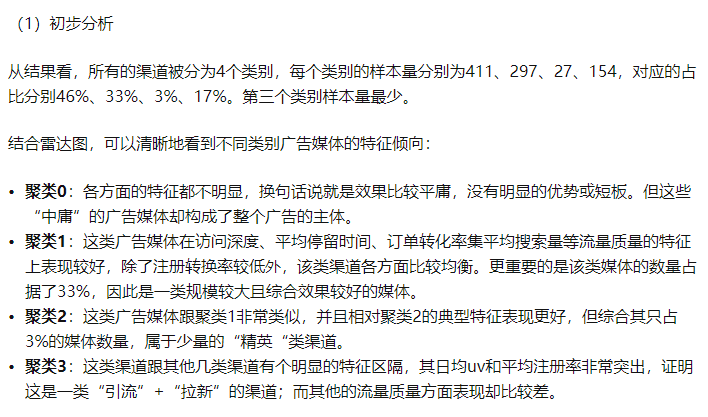

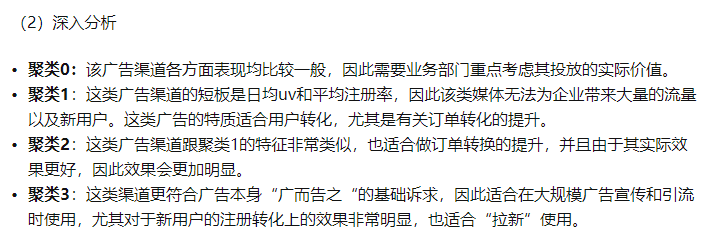

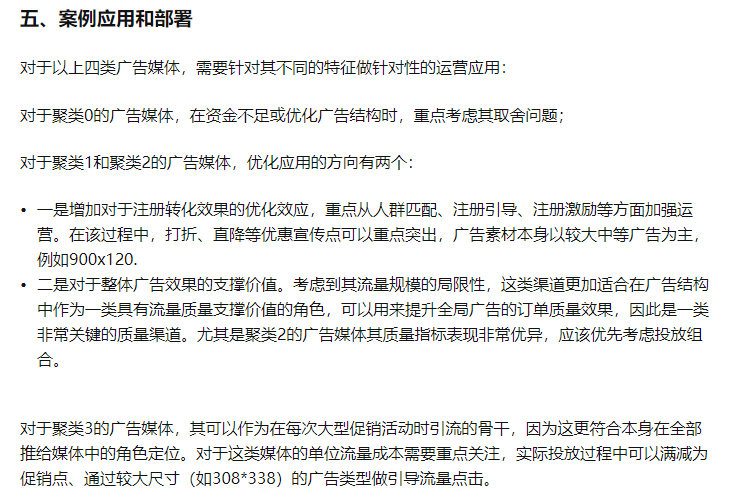

## 不同聚类方法的优缺点

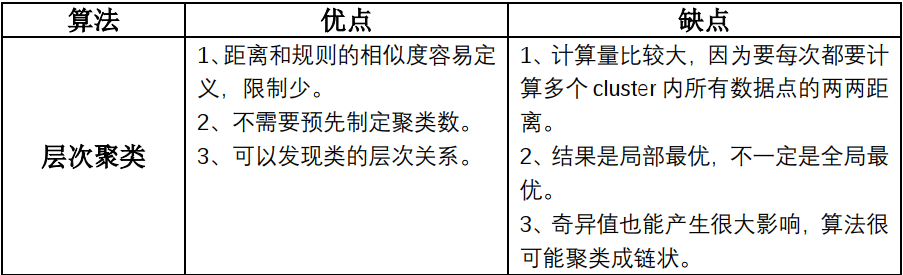

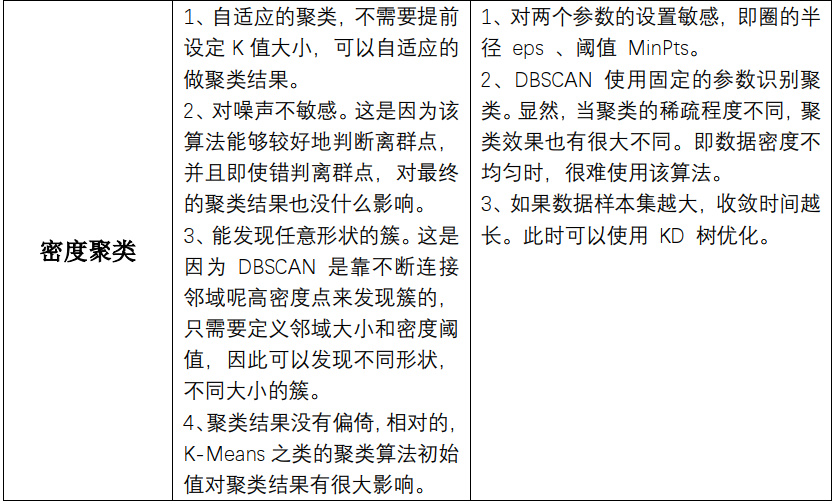

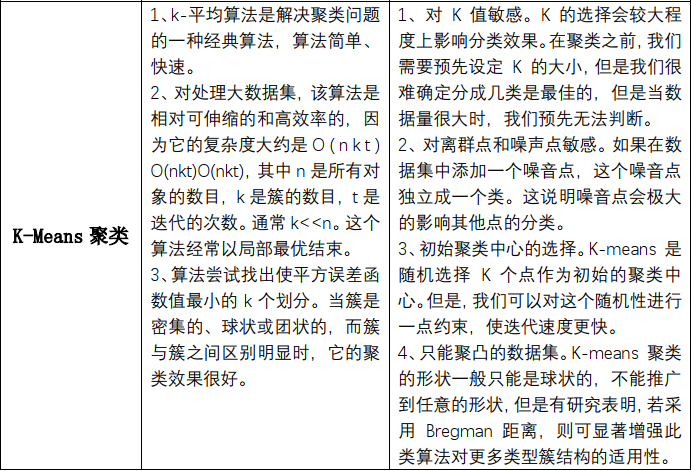

## 利用聚类实现移动客户的分类，并三人一组完成聚类的报告

#### 注：代码实现在这里，报告另外以word提交